# Clustering

Learning Objectives:
* Students will learn the difference between supervised and unsupervised learning.
* Students will be exposed to three algorithmic approaches to clustering data: k-means, DBSCAN, and agglomerative hierarchical clustering.
* Students will practice the application of these three clustering algorithms with sklearn's corresponding modules.

Video/Readings before class:
* Supervised Learning versus Unsupervised Learning and $k$-Means Clustering:
  * Watch this video on [$k$-Means Clustering](http://cs.gettysburg.edu/~tneller/videos/ds256/kmeans.mp4) ([slides](http://modelai.gettysburg.edu/2016/kmeans/assets/k-Means_Clustering.pdf)).
  * Play with the [OnMyPhd.com demonstration of $k$-Means Clustering](http://www.onmyphd.com/?p=k-means.clustering&ckattempt=1)
  * Jake VanderPlas. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/):
      * [Chapter 5 section "In Depth: k-Means Clustering"](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
  * Optional readings/reference: Wikipedia articles on [$k$-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering) and [Determining the number of clusters in a dataset](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)
* DBSCAN:
  * [scikit learn documentation on DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
  * [scikit learn DBSCAN demonstration](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)
  * [AnalyticsVidhya's "How DBSCAN Works"](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)
* Hierarchical Clustering:
  * [scikit learn documentation on Agglomerative Hierarchical Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

Before class:
* View/read the above resources so as to understand how each of the three different clustering methods works.  Below, we will demonstrate the application of the clustering methods as implemented in the sklearn library.

In class:
* We will work together on the exercises in section "In Class".

Homework after class:
* Complete the section labeled "Homework" below before the next class when it will be collected.



# Supervised Versus Unsupervised Learning

* **Supervised Learning** – Given training input and output (x, y) pairs, learn a function $y = \hat{f}(x)$ to approximate an unknown function $y = f(x)$.
* **Unsupervised Learning** - Given only training input, learn structural information about the data.


## Clustering

One common unsupervised learning problem is that of clustering data.  _Clustering_ is grouping a set of objects such that objects in the same group (i.e. cluster) are more similar to each other in some sense than to objects of different groups.

We will experiment with the simplest of clustering problems: finding clusters of 2-dimensional points.

* Given: 
  * a set of $n$ observations ${\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n}$, where each observation is a $d$-dimensional real vector
  * a number of clusters $k$
* Compute: a cluster assignment mapping $𝐶(\mathbf{x}_i)\in{1, \ldots, k}$ that minimizes the within cluster sum of squares (WCSS):
  * $\Sigma_{i=1}^n || \mathbf{x}_𝑖 − \mu_{𝐶(\mathbf{x}_𝑖)} ||^2$ where centroid $\mu_{𝐶(\mathbf{x}_𝑖)}$ is the mean of the points in cluster $𝐶(\mathbf{x}_𝑖)$

### $k$-Means Clustering

The general algorithm for $k$-means clustering is as follows:

* Randomly choose $k$ cluster centroids $𝝁_1,𝝁_2, … 𝝁_𝑘$ and arbitrarily initialize cluster assignment mapping $𝐶$.
* While remapping $𝐶$ from each $\mathbf{x}_𝑖$ to its closest centroid $𝝁_𝑗$ causes a change in $𝐶$:
  * Recompute $𝝁_1,𝝁_2, … 𝝁_𝑘$ according to the new $𝐶$

Summarizing, in order to minimize the WCSS, we alternately:
* Recompute $𝐶$ to minimize the WCSS holding $𝝁_𝑗$ fixed.
* Recompute $𝝁_𝑗$ to minimize the WCSS holding $𝐶$ fixed.

In minimizing the WCSS, we seek a clustering that minimizes Euclidean distance variance within clusters.


In [1]:
# Imports

import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import math
import random
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


We first create a blobs dataset of 1000 points in 4 distinct clusters:

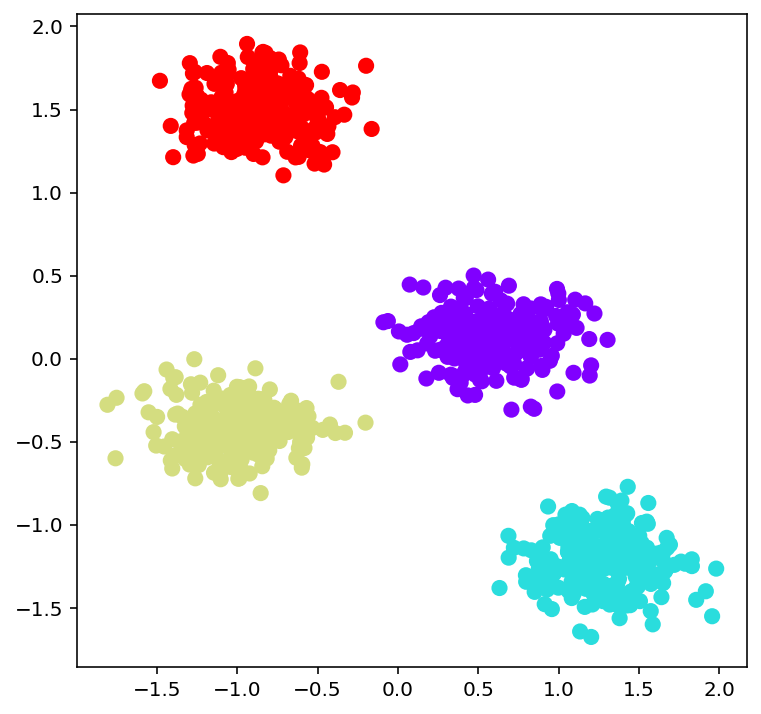

In [2]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

X, y = make_blobs(n_samples=1000, centers=4,
                  random_state=my_seed, cluster_std=0.4)

# As with k-nearest neighbor classification/regression where distance metrics matter,
# we need to normalize the data.  One sklearn tool from this is the StandardScaler:

scaler = StandardScaler()
X = scaler.fit_transform(X)

# StandardScaler makes the data have mean 0 and standard deviation 1 in each dimension.
# We could call just the transform functionin order to retain and reuse the same scaler transformation in the future without fitting it to the new given data.

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');


Next, we apply $k$-means clustering with $k = 4$ using the ```sklearn.cluster.KMeans```.  We will end up with different labels (represented by different colors), yet the labels will have a consistent one-to-one mapping with the original labels that were not supplied to the algorithm.  This is the ideal, to discern clustering order in data.

First 20 X Labels: [2 1 2 0 3 1 1 3 1 1 2 3 0 2 3 0 0 2 1 3]
Cluster Centers:
 [[-1.00747345 -0.41813065]
 [ 0.58147614  0.1229734 ]
 [-0.85966395  1.50280844]
 [ 1.28566127 -1.20765119]]


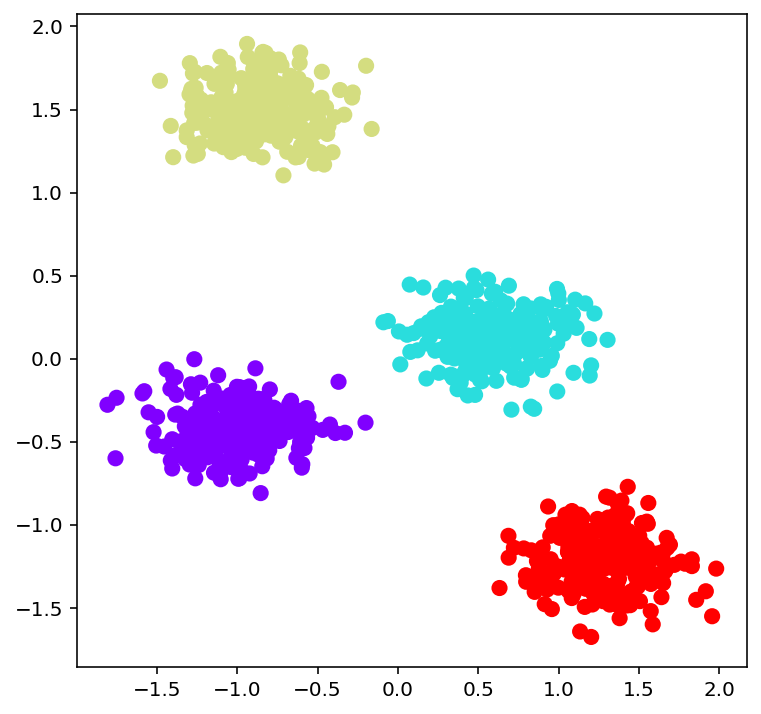

In [3]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print('First 20 X Labels:', kmeans.labels_[:20])
print('Cluster Centers:\n', kmeans.cluster_centers_)
y_clusters = kmeans.predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_clusters, s=50, cmap='rainbow');


Watch what happens when we choose a different $k = 3$:

First 20 X Labels: [0 1 0 2 1 1 1 1 1 1 0 1 2 0 1 2 2 0 1 1]
Cluster Centers:
 [[-0.85966395  1.50280844]
 [ 0.94136848 -0.54787407]
 [-0.99213693 -0.40927785]]


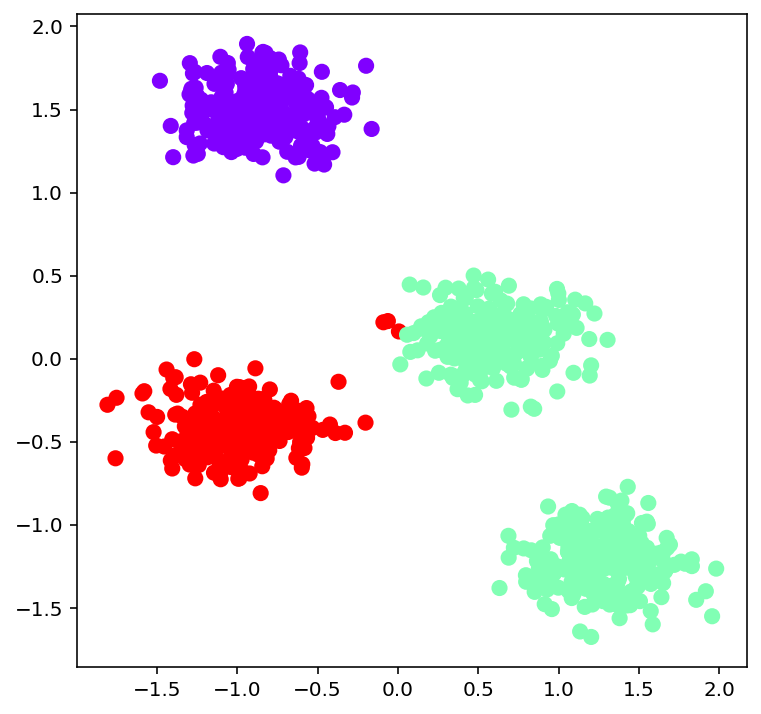

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('First 20 X Labels:', kmeans.labels_[:20])
print('Cluster Centers:\n', kmeans.cluster_centers_)
y_clusters = kmeans.predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_clusters, s=50, cmap='rainbow');

Below, we will define a function for computing the Within-Cluster Sum of Squares (WSCC) for different $k$ on this data.

In [5]:
def get_WCSS(X, kmeans):
    centroids = kmeans.cluster_centers_[kmeans.labels_]
    diffs = X - centroids
    return sum(sum(diffs * diffs))

k_values = [1, 2, 3, 4, 5, 6, 7]
WCSS_values = [get_WCSS(X, KMeans(n_clusters=k, random_state=0).fit(X)) for k in k_values]
print('k values:', k_values)
print('WCSS values:', WCSS_values)

k values: [1, 2, 3, 4, 5, 6, 7]
WCSS values: [1999.9999999999993, 831.0630206874047, 369.6129536092786, 87.03135159690099, 75.66652075634391, 65.34345833652259, 55.551167807151906]


Now let us do the same for generated uniform data.

In [6]:
X_uniform = np.random.uniform(size=(1000, 2))
X_uniform = StandardScaler().fit_transform(X_uniform)
WCSS_values_uniform = [get_WCSS(X_uniform, KMeans(n_clusters=k, random_state=0).fit(X_uniform)) for k in k_values]
print('k values:', k_values)
print('Uniform WCSS values:', WCSS_values_uniform)

k values: [1, 2, 3, 4, 5, 6, 7]
Uniform WCSS values: [2000.0000000000011, 1233.2920691906415, 761.9117625641154, 480.31461559348395, 402.70409460086773, 343.09942197756357, 289.76477646289015]


For the blob and uniform data as orange and blue lines, respectively, let us plot:
* WCSS values of each,
* log(WCSS) values of each, and
* the difference of those logarithms (in green).

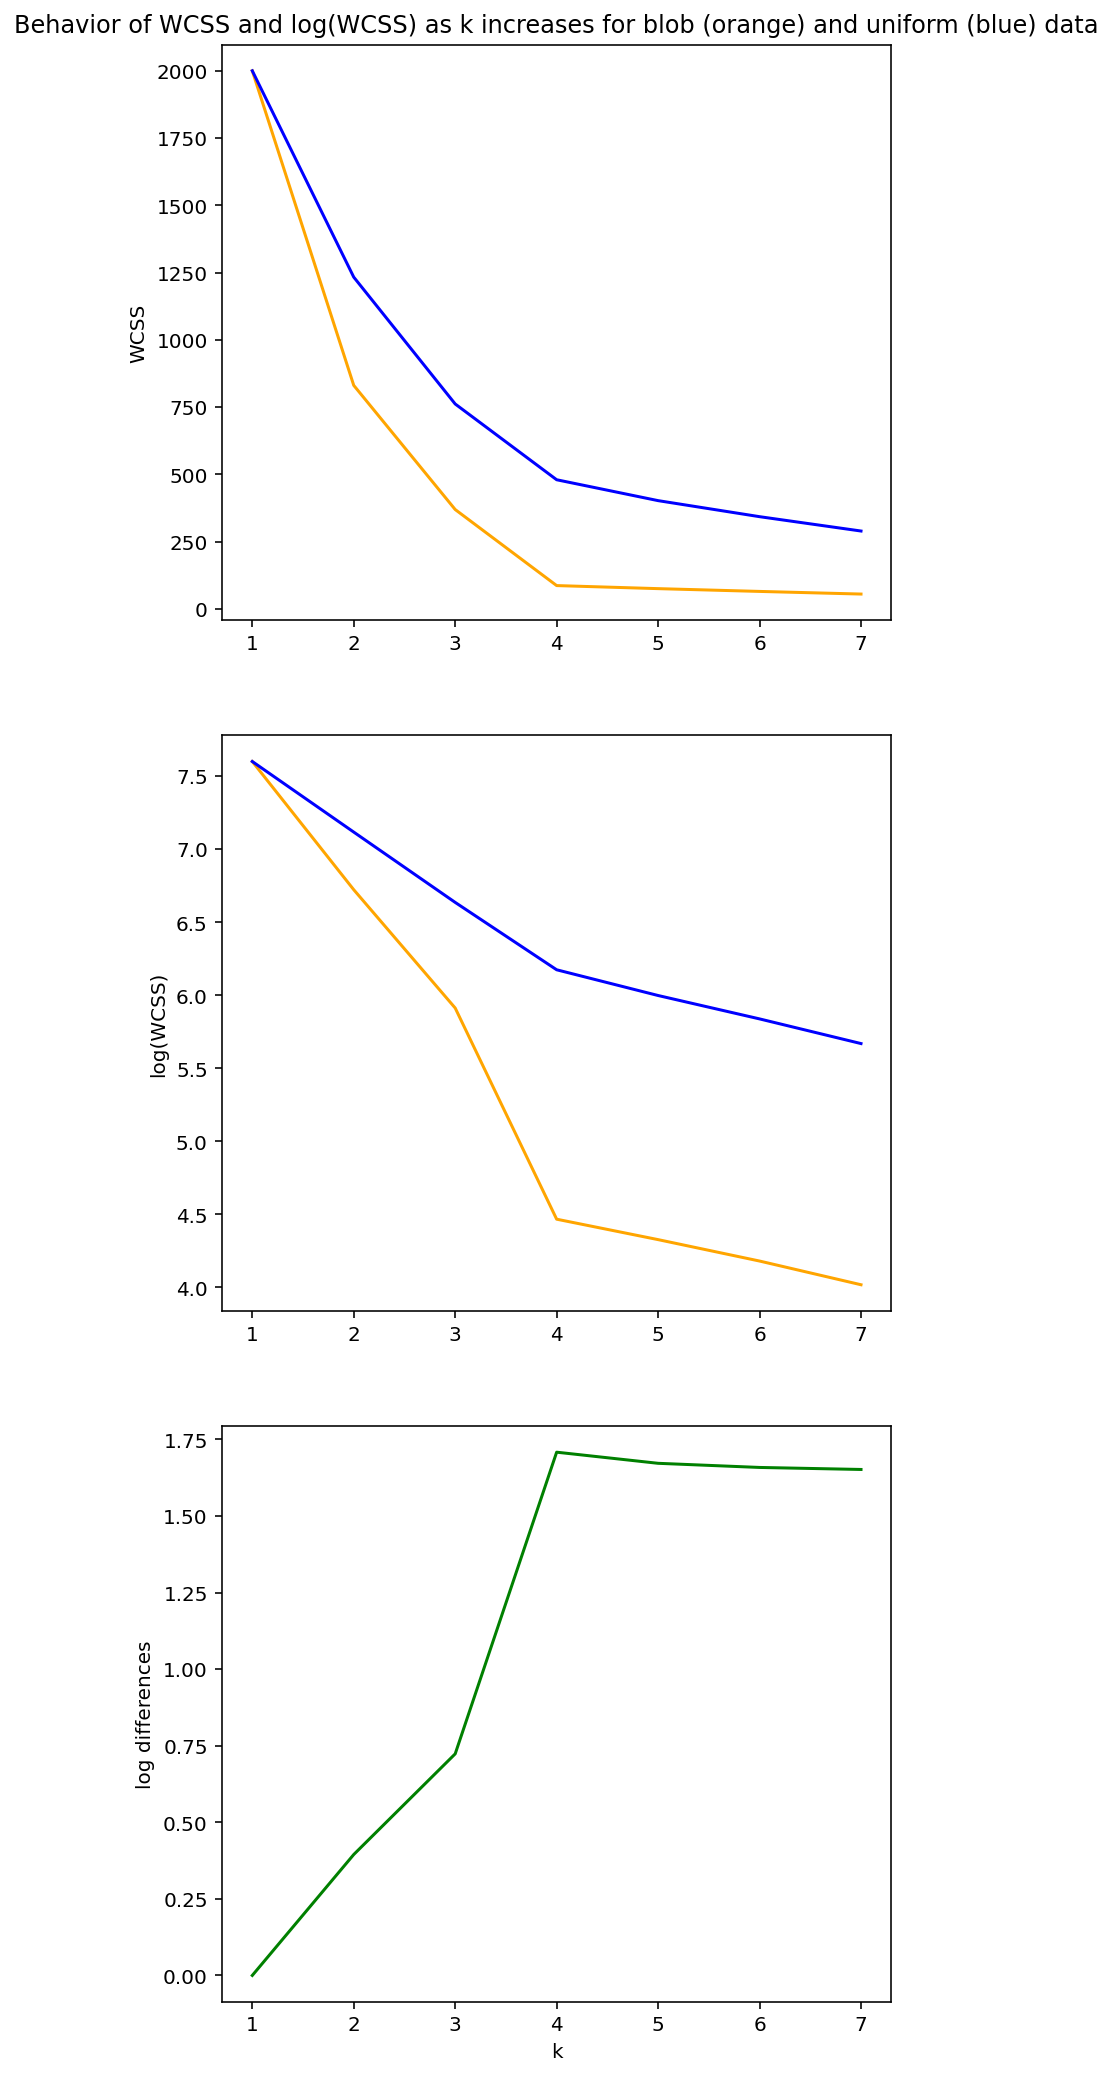

In [7]:
plt.figure(figsize=(6, 18))

plt.subplot(3, 1, 1)
plt.plot(k_values, WCSS_values, color='orange');
plt.plot(k_values, WCSS_values_uniform, color='blue');
plt.title('Behavior of WCSS and log(WCSS) as k increases for blob (orange) and uniform (blue) data')
plt.ylabel('WCSS')

plt.subplot(3, 1, 2)
plt.plot(k_values, np.log(WCSS_values), color='orange');
plt.plot(k_values, np.log(WCSS_values_uniform), color='blue');
plt.ylabel('log(WCSS)')


plt.subplot(3, 1, 3)
plt.plot(k_values, np.log(WCSS_values_uniform) - np.log(WCSS_values), color='green');
plt.ylabel('log differences')
plt.xlabel('k')

plt.show()


In practice, we would perform iterative $k$-means clustering and retain the minimum WCSS clustering, and we would also perform a number of uniform data clusterings and take the average as a baseline WCSS for comparison, the simple example above shows both
 1. the discernable "elbow" at $k=4$, and
 2. the fact that the difference in log(WCSS) between the data and uniform data peaks at $k=4$.

In short, to discern the best $k$ for $k$-means clustering, one should try a range of $k$ values and use one of these methods to select the minimum $k$ that best describes structure in the data.

### DBSCAN

The **D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise (DBSCAN) algorithm makes the assumption that clusters are defined by a density threshold of data, and that points not within such areas of density are labeled as "noise".  Unlike $k$-means clustering, DBSCAN clustering is not supplied with the number of clusters $k$.  Instead, it is supplied a radius $\epsilon$ and a minimum number of points/samples.  Consider this example from Wikipedia:

![Wikipedia DBSCAN example figure](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png)

In this example we have 2-D points and $\epsilon$ is the radius of the circle around each point. The minimum number of points within each circle for the point at the center to be considered a _core_ point is 4.  These core points (e.g. point A) and their circles are colored red.  Points without any other points within their circle (e.g. point N), are called _noise_ points and do not belong to any cluster.  Points with less than the minimum number of points to be considered core, yet having at least one other point within $\epsilon$ (e.g. points B and C) are called _border_ points.

The structure of clusters is built from relationships between core and border points.  We say that a point $P_j$ is _directly reachable_ from point $P_i$ if $P_i$ is a core point and $P_j$ is within $\epsilon$ of $P_i$.  Put another way, points can only be directly reachable from core points, and any point $P_j$ within $\epsilon$ of core point $P_i$ is directly reachable from $P_i$.  (A border point can be directly reachable from a core point, but by definition, nothing is directly reachable from a border point.)

Points can also be indirectly reachable from a core point.  If we can construct a chain of points, $P_1, P_2, \ldots, P_n$ such $P_i$ is directly reachable from $P_{i-1}$, then we say that $P_n$ is (indirectly) reachable from $P_1$.  

A cluster $C$ is a set of points where (1) $C$ contains as least one core point, and (2) every point in $C$ is reachable from any core point.

While this takes the burden off of the user for determining $k$, it means that one needs to tune _two_ variables: **$\epsilon$** and **the minimum points** within $\epsilon$ for a point to be considered core.  Too large or small an $\epsilon$, for example, and we can end up with one large cluster or all noise, respectively.  Let's see this in action with ```sklearn.cluster.DBSCAN```:

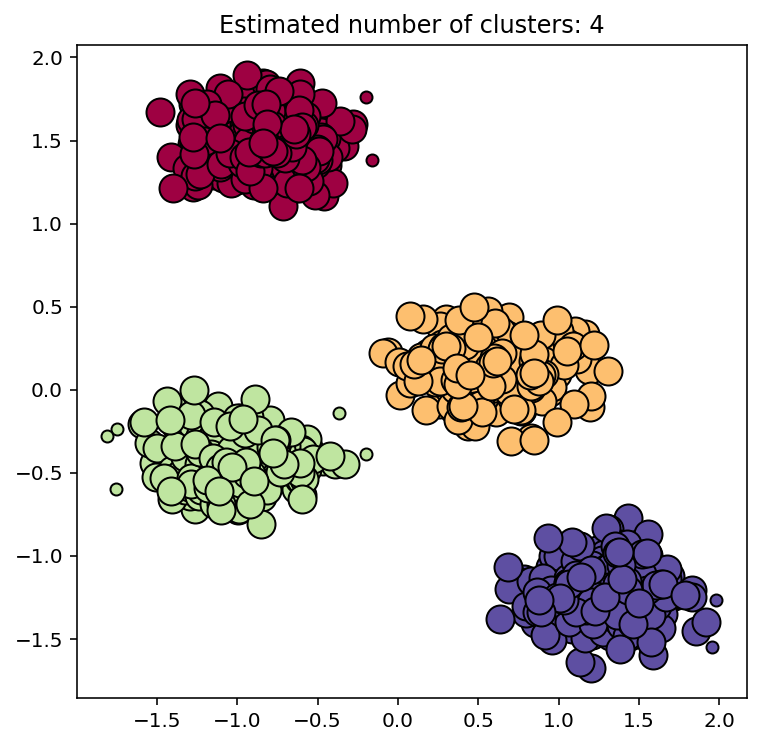

Estimated number of noise points: 0


In [8]:
# Define a visualization according to https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py:

def visualize_DBSCAN(X, dbscan):
    plt.figure(figsize=(6, 6))
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    labels = dbscan.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

    print('Estimated number of noise points: %d' % n_noise_)


# Compute DBSCAN and visualize:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
visualize_DBSCAN(X, dbscan);

Watch what happens with values of $\epsilon$ set too high and too low:

Epsilon: 1, Minimum points: 10


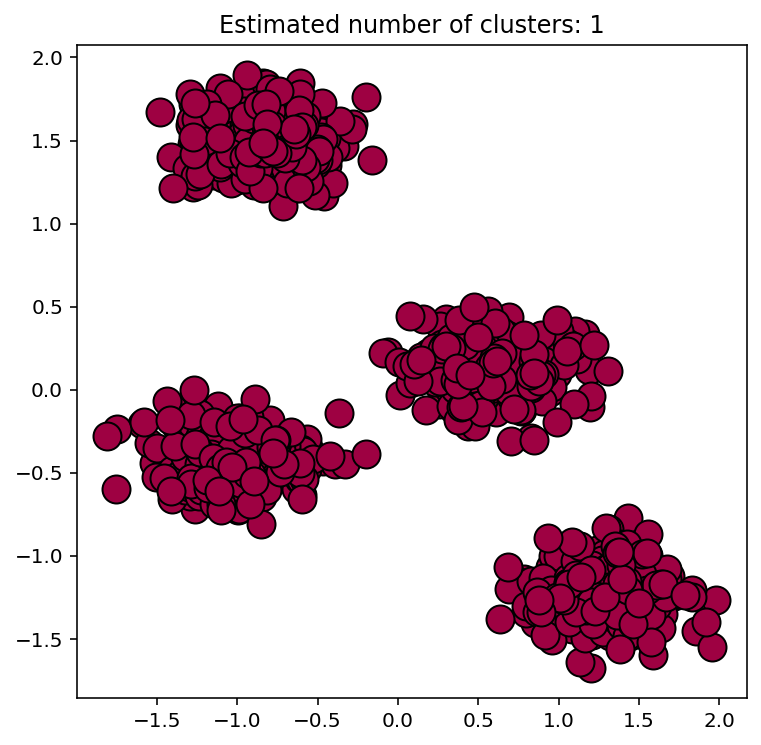

Estimated number of noise points: 0
Epsilon: 0.01, Minimum points: 10


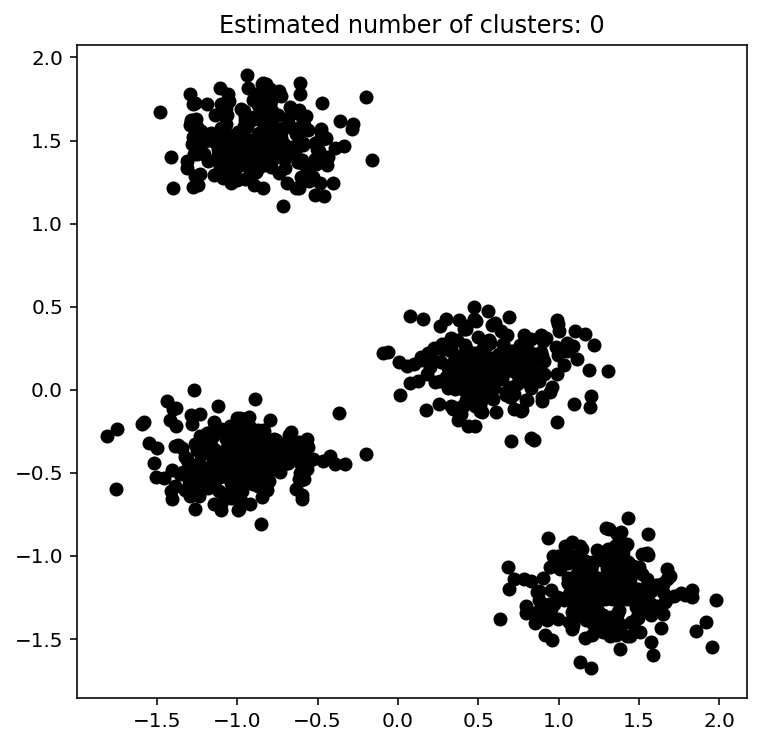

Estimated number of noise points: 1000


In [9]:
epsilon = 1
min_points = 10
print('Epsilon: {}, Minimum points: {}'.format(epsilon, min_points))
dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(X)
visualize_DBSCAN(X, dbscan)

epsilon = .01
min_points = 10
print('Epsilon: {}, Minimum points: {}'.format(epsilon, min_points))
dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(X)
visualize_DBSCAN(X, dbscan)

If the circles (or _hyperspheres_ in higher dimensional data) have a radius $\epsilon$ that is too high, then everything is in the same cluster.  If $\epsilon$ is too low, then everything is noise and there are no clusters.

Now lets see what happens when we set the minimum points too high and too low:

Epsilon: 0.3, Minimum points: 200


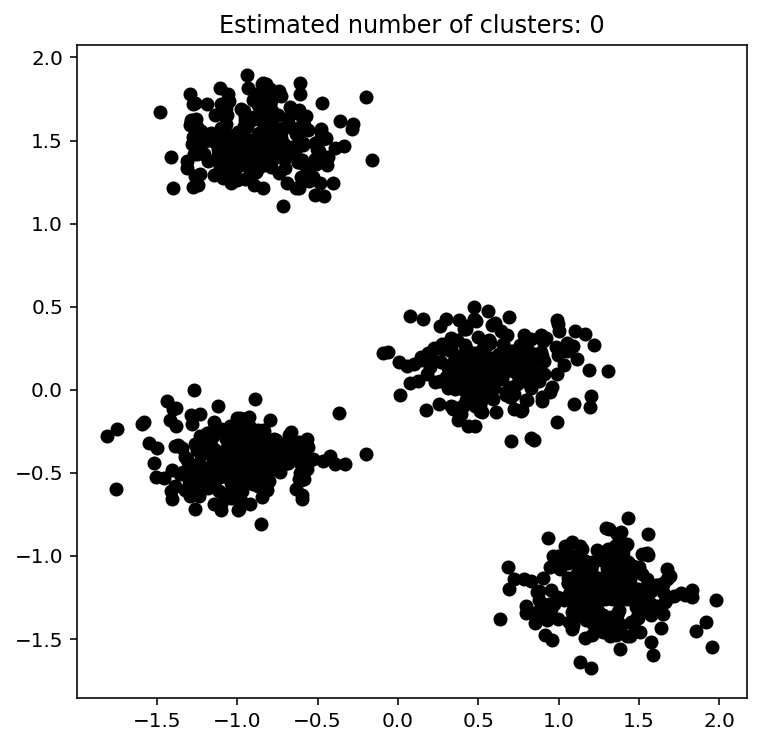

Estimated number of noise points: 1000
Epsilon: 0.3, Minimum points: 1


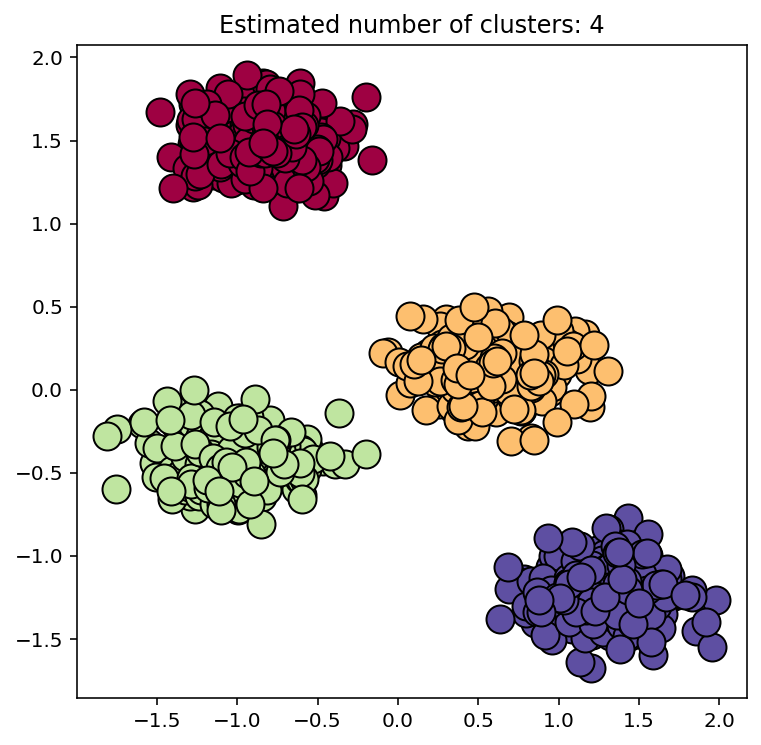

Estimated number of noise points: 0


In [10]:
epsilon = .3
min_points = 200
print('Epsilon: {}, Minimum points: {}'.format(epsilon, min_points))
dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(X)
visualize_DBSCAN(X, dbscan)

epsilon = .3
min_points = 1
print('Epsilon: {}, Minimum points: {}'.format(epsilon, min_points))
dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(X)
visualize_DBSCAN(X, dbscan)

When the minimum number of points is too high, then nothing can be a core point and thus everything is noise.  When the minimum number of points is too low, we are only saved by the choice of epsilon and the separation of the data here.  We have the correct number of clusters, but note that there are _no border points_.  Every point is a core point.

It is the correct selection of the $\epsilon$ radius and the number of points within that radius that defines the density and extend of the reachability relationship that brings out the best performance of this algorithm.

Having one more parameter than $k$-means clustering makes it more complex to tune, but it is able to handle many more cluster shapes than $k$-means clustering.

### Hierarchical Clustering

Hierarchical clustering algorithms are generally one of two types:
* _Divisive_ clustering starts with all points in a single cluster and iteratively divides one cluster into two until the desired number of clusters is reached.
* _Agglomerative_ clustering starts with all points being a singleton cluster and iteratively merges two clusters into one until the desired number of clusters is reached.

Here we focus on agglomerative clustering, and ```sklearn``` offers four different _linkage_ criteria to choose from in order to decide which two clusters to merge in a given iteration.  The linkage options are called "ward" (the default), "complete", "average", and "single".  Think of each of these as a distance metric between clusters.  On each iteration, agglomerative clustering merges two clusters with minimum distance according to the chosen metric.  Here is a description of each from the documentation:

* ```ward``` minimizes the variance of the clusters being merged.
* ```average``` uses the average of the distances of each observation of the two sets.
* ```complete``` or maximum linkage uses the maximum distances between all observations of the two sets.
* ```single``` uses the minimum of the distances between all observations of the two sets.

Put another way, ```ward``` minimizes $k$-means clustering WCSS divided by the number of points in the combined clusters.
Given two clusters, $A$ and $B$, the other methods look at all point pairs $(a, b)$ where $a \in A$ and $b \in B$, and consider average, maximum, and minimum distances over pairs.  For example, ```single linkage``` will merge two clusters that have a pair of points closest to one another.

Each of these strategies has strengths and weaknesses.  Hierarchical clustering is often applied in bioinformatics to discovering structure in genetic similarities.

Like $k$-means clustering, we need to supply the desired number of clusters $k$.  We will now apply this to the same blobs data:

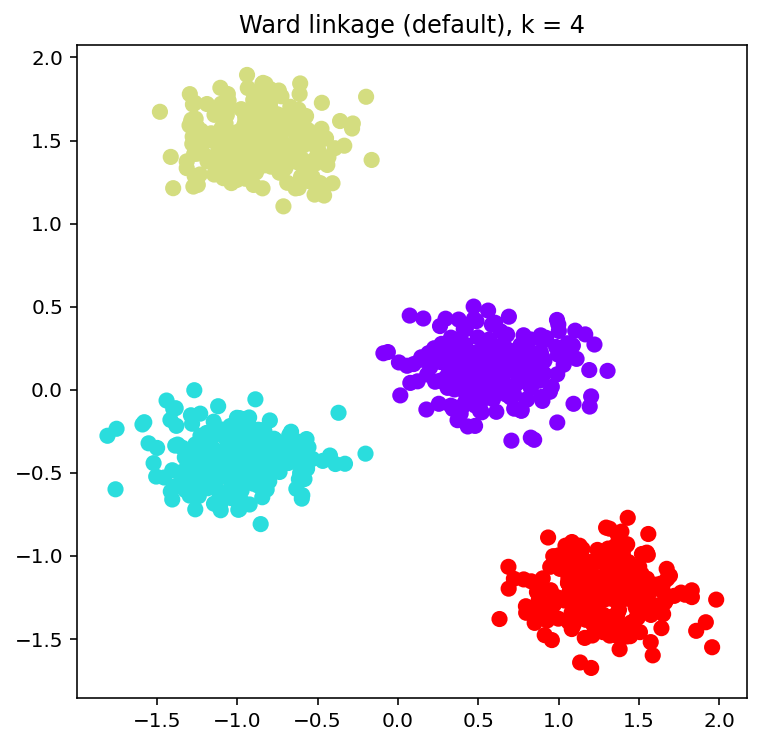

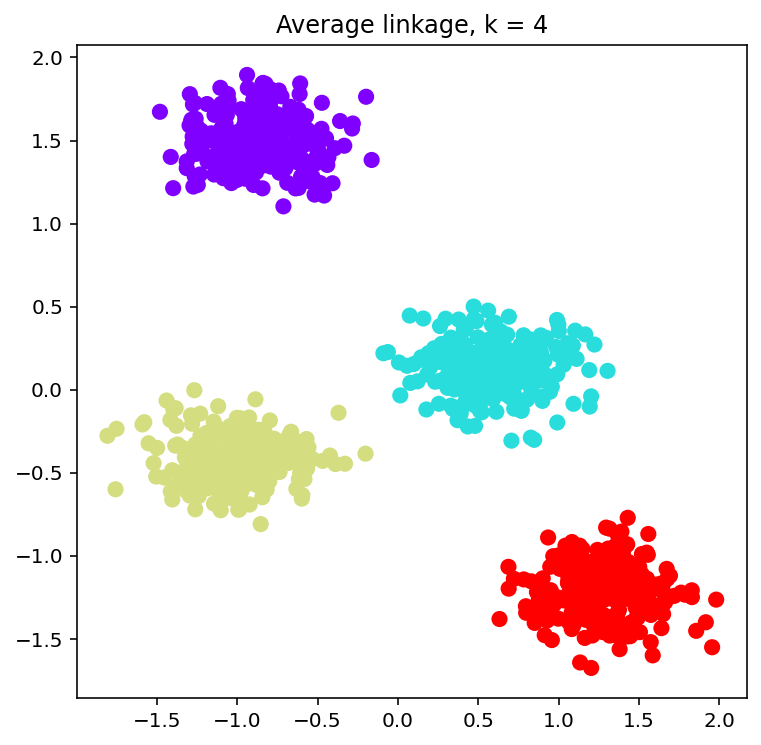

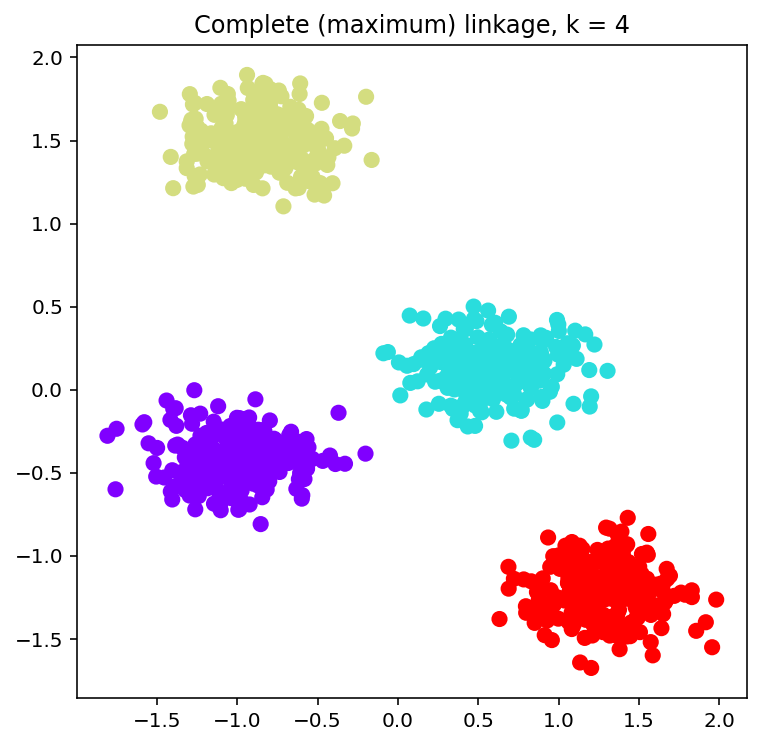

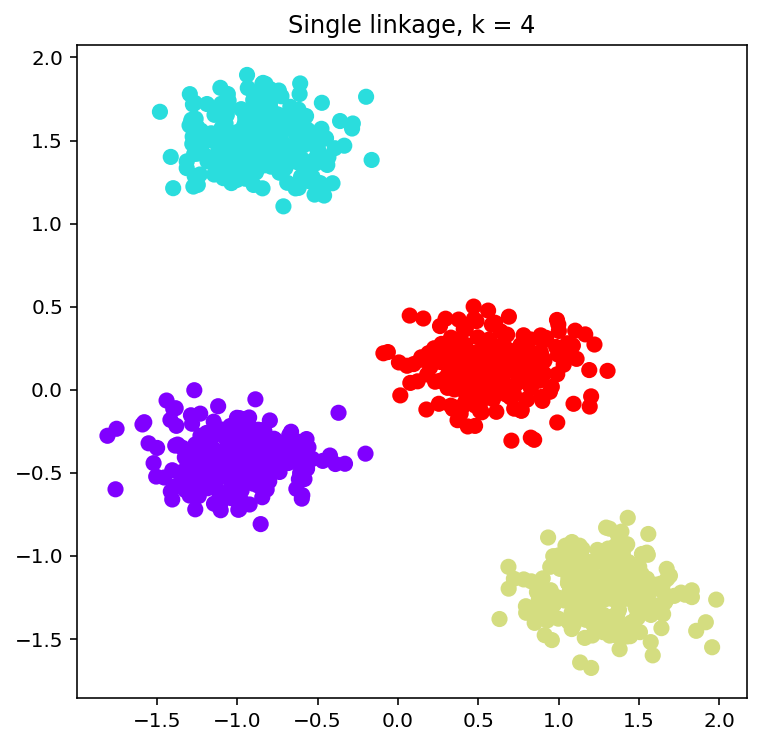

In [11]:
k = 4

model = AgglomerativeClustering(n_clusters=k).fit(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=50, cmap='rainbow')
plt.title('Ward linkage (default), k = ' + str(k))
plt.show()

model = AgglomerativeClustering(linkage='average', n_clusters=k).fit(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=50, cmap='rainbow')
plt.title('Average linkage, k = ' + str(k))
plt.show()

model = AgglomerativeClustering(linkage='complete', n_clusters=k).fit(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=50, cmap='rainbow')
plt.title('Complete (maximum) linkage, k = ' + str(k))
plt.show()

model = AgglomerativeClustering(linkage='single', n_clusters=k).fit(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=50, cmap='rainbow')
plt.title('Single linkage, k = ' + str(k))
plt.show()

# In Class

Perform the following steps commented below.


In [12]:
# Load ic16-1.csv into a DataFrame df and print a description and head to get a sense of the 2D data.



# Use X = df.values to get a numpy array of the loaded data.  Use StandardScaler to normalize the data.



# Scatter plot the 2D data



# Plot cluster-colored scatter plots and print cluster centers showing the results of k-means clustering for k = 3, 4, 5.
# Each plot title should indicate the use of k-means clustering and specify the k for the plot,
# e.g. "k-Means Clustering with k = 3"



# Now apply DBSCAN with default setting and plot the results as a cluster-colored scatter plot along with the estimated number of noise points.
print('\n\nDBSCAN Default')



# Apply DBSCAN with three different values of epsilon (and default min_samples), with one epsilon too high, one too low, and one just right.
# Visualize and print number of noise points as before.
print('\n\nDBSCAN epsilon = ' + str(1.0)) # Sample print statement before plot



# Now apply DBSCAN with two different values of min_samples (and "just right" eps from the previous attempt),
# such that the first has a < 10 noise points and the second has none.
# Visualize and print number of noise points as before.



# Apply agglomerative hierarchical clustering with k = 4 for each of the four linkage options.
# Use default parameter values except for n_clusters and linkage.
# Plot the results of each as done previously.
# Print which works best and why.
print("\n\nAgglomerative Hierachical Clustering:")





DBSCAN Default


DBSCAN epsilon = 1.0


Agglomerative Hierachical Clustering:


If you have extra time in class, use the demonstration code below to create your own clustering data.  Use a paint program to create cluster regions or download an image with dark clusters on a light background.  The following code loads an image file (e.g. .png, .jpg), thresholds and samples random pixels that are more dark than light, and creates data suitable for experimentation.  This can provide good means of experimenting with clustering techniques.

**TO-DO (if time): Create your own clustering challenge problem by processing an image as shown below.  Experiment with different clustering methods to see which works best for your clusters.**

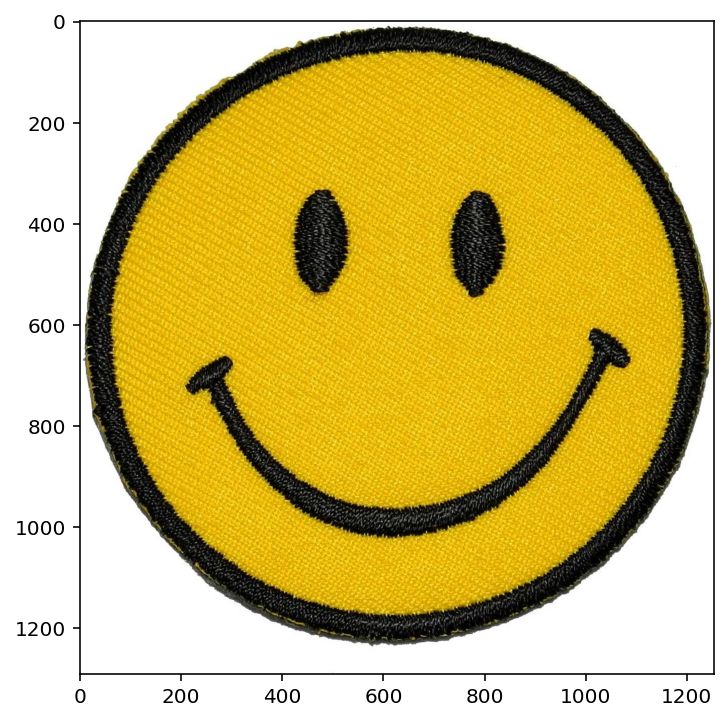

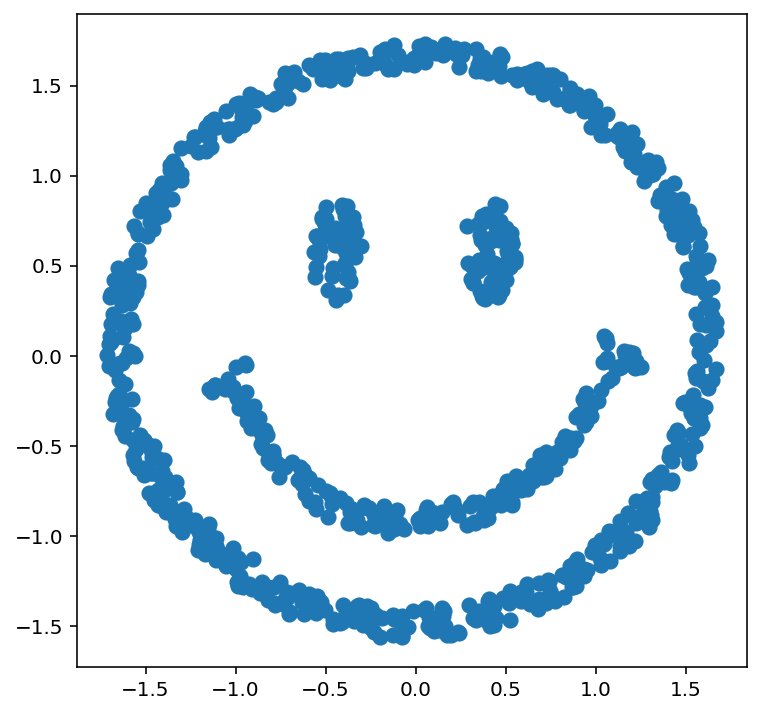



DBSCAN epsilon = 0.3


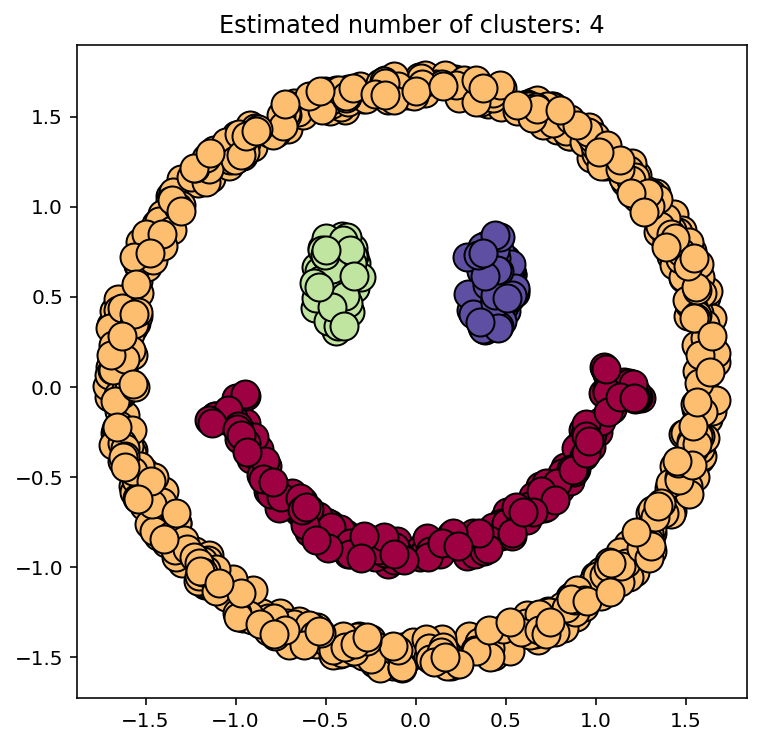

Estimated number of noise points: 0


In [13]:
import cv2

# specify image filename and dataset size
filename = 'smiley.jpg'
num_points = 1000

# Read and show original image
img = cv2.imread(filename)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(RGB_img)

# Convert image into cluster dataset

# Adapted from https://pythonexamples.org/python-opencv-convert-image-to-black-and-white/
# read image
img_grey = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# define a threshold (128 is the middle of black and white in grey scale)
thresh = 128

# threshold the image
img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]

# grab the image dimensions
h = img_binary.shape[0]
w = img_binary.shape[1]

# loop over the image, pixel by pixel, and take a random sample of desired size
random.seed(0)
b_pts = [[x, -y] for y in range(0, h) for x in range(0, w) if img_binary[y, x] < thresh]
b_pts = random.sample(b_pts, num_points)
df = pd.DataFrame(data=b_pts, columns=['x1', 'x2'])
df.index.name = 'id'

# Now you can perform the same experimentation, but change your image to a different one with dark/light pixels indicating cluster/no-cluster regions.

# Use X = df.values to get a numpy array of the loaded data.  Use StandardScaler to normalize the data.

X = df.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Scatter plot the 2D data

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='rainbow')
plt.show()

# TO-DO: Change the input image from smiley.jpg to one of your own that defines different shaped clusters.
# Then practice and experiment with it.

epsilon = 0.3
print('\n\nDBSCAN epsilon = ' + str(epsilon))
dbscan = DBSCAN(eps=epsilon).fit(X)
visualize_DBSCAN(X, dbscan);

## Homework


**Exercise 1:** Complete the in-class exercises if you haven't already.

**Exercise 2:** Perform all the same clustering exercises you did in-class with the data of [hw16-1.csv](http://cs.gettysburg.edu/~tneller/ds256/data/hw16/hw16-1.csv).
Read the comment instructions carefully to note variations in parameter settings, etc.


In [14]:
# Load http://cs.gettysburg.edu/~tneller/ds256/data/hw16/hw16-1.csv into a DataFrame df and print a description and head to get a sense of the 2D data.



# Use X = df.values to get a numpy array of the loaded data.  Use StandardScaler to normalize the data.



# Scatter plot the 2D data



# Plot cluster-colored scatter plots and print cluster centers showing the results of k-means clustering for k = 5, 10, and 15.
# Each plot title should indicate the use of k-means clustering and specify the k for the plot,
# e.g. "k-Means Clustering with k = 5"



# Now apply DBSCAN with default setting and plot the results as a cluster-colored scatter plot along with the estimated number of noise points.
print('\n\nDBSCAN Default')



# Apply DBSCAN with three different values of epsilon (and default min_samples), with one epsilon too high, one too low, and one just right.
# Your "just right" value should estimate 10 clusters.
# Visualize and print number of noise points as before.
print('\n\nDBSCAN epsilon = ' + str(1.0)) # Sample print statement before plot



# Now apply DBSCAN with two different values of min_samples (and "just right" eps from the previous attempt),
# such that the first has a < 10 noise points and the second has none.
# Visualize and print number of noise points as before.



# Apply agglomerative hierarchical clustering with k = 10 for each of the four linkage options.
# Use default parameter values except for n_clusters and linkage.
# Plot the results of each as done previously.
# Print which works best and why.
print("\n\nAgglomerative Hierachical Clustering:")





DBSCAN Default


DBSCAN epsilon = 1.0


Agglomerative Hierachical Clustering:


(end of homework)